In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import missingno as msno

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom # This is for the unsupervised clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [29]:
df = pd.read_csv("data\\2013_01_01_2014_01_01_day_temp.csv")

In [30]:
df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
0,2013-01-01 00:00:00,MAC000002,Std,0.219,ACORN-A,Affluent,Tuesday,48.02,January
1,2013-01-01 00:30:00,MAC000002,Std,0.241,ACORN-A,Affluent,Tuesday,47.84,January
2,2013-01-01 01:00:00,MAC000002,Std,0.191,ACORN-A,Affluent,Tuesday,47.66,January
3,2013-01-01 01:30:00,MAC000002,Std,0.235,ACORN-A,Affluent,Tuesday,47.39,January
4,2013-01-01 02:00:00,MAC000002,Std,0.182,ACORN-A,Affluent,Tuesday,47.12,January
...,...,...,...,...,...,...,...,...,...
19654435,2014-01-01 21:30:00,MAC004219,Std,0.266,ACORN-E,Affluent,Wednesday,42.80,January
19654436,2014-01-01 22:00:00,MAC004219,Std,0.260,ACORN-E,Affluent,Wednesday,42.80,January
19654437,2014-01-01 22:30:00,MAC004219,Std,0.301,ACORN-E,Affluent,Wednesday,42.80,January
19654438,2014-01-01 23:00:00,MAC004219,Std,0.223,ACORN-E,Affluent,Wednesday,42.80,January


In [31]:
df['DateTime'] = pd.to_datetime(df['DateTime']) # convert to datetime datetype

In [32]:
gb1 = df.groupby(['Acorn_grouped', 'stdorToU']) # group by to do more EDA.
groups = dict(list(gb1)) # makes a dict of dataframs which can be accesed below. 

In [33]:
(gb1.size()/17580).round(0) # how many series belong to each group.

Acorn_grouped  stdorToU
Adversity      Std         280.0
               ToU          70.0
Affluent       Std         348.0
               ToU         106.0
Comfortable    Std         241.0
               ToU          73.0
dtype: float64

In [34]:
gb1.describe().round(3) # 5 number summary.

KWH/hh                                          \
                            count   mean    std  min    25%    50%    75%   
Acorn_grouped stdorToU                                                      
Adversity     Std       4922400.0  0.186  0.242  0.0  0.059  0.114  0.218   
              ToU       1230600.0  0.174  0.230  0.0  0.051  0.103  0.200   
Affluent      Std       6117840.0  0.262  0.392  0.0  0.061  0.129  0.285   
              ToU       1863480.0  0.189  0.256  0.0  0.053  0.103  0.218   
Comfortable   Std       4236780.0  0.228  0.306  0.0  0.066  0.132  0.268   
              ToU       1283340.0  0.185  0.251  0.0  0.059  0.113  0.212   

                              air_temperature                                \
                          max           count    mean     std    min    25%   
Acorn_grouped stdorToU                                                        
Adversity     Std       6.299       4922400.0  51.681  12.046  24.44  42.44   
              ToU       6.234       1230600.0  51.681  12.046  24.44  42.44   
Affluent      Std       9.141       6117840.0  51.681  12.046  24.44  42.44   
              ToU       7.131       1863480.0  51.681  12.046  24.44  42.44   
Comfortable   Std       6.392       4236780.0  51.681  12.046  24.44  42.44   
              ToU       6.177       1283340.0  51.681  12.046  24.44  42.44   

                                              
                           50%    75%    max  
Acorn_grouped stdorToU                        
Adversity     Std       50.945  60.44  92.66  
              ToU       50.945  60.44  92.66  
Affluent      Std       50.945  60.44  92.66  
              ToU       50.945  60.44  92.66  
Comfortable   Std       50.990  60.44  92.66  
              ToU       50.945  60.44  92.66

In [35]:
Adversity_Std = groups['Adversity', 'Std']
Adversity_ToU = groups['Adversity', 'ToU']
Affluent_Std = groups['Affluent', 'Std']
Affluent_ToU = groups['Affluent', 'ToU']
Comfortable_Std = groups['Comfortable', 'Std']
Comfortable_ToU = groups['Comfortable', 'ToU']

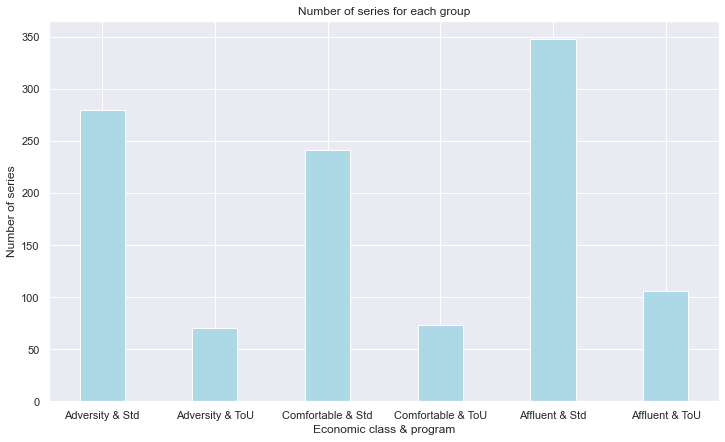

In [75]:
# creating the dataset
group = ['Adversity & Std', 'Adversity & ToU', 'Comfortable & Std', 'Comfortable & ToU',
         'Affluent & Std', 'Affluent & ToU',]
mean = [280, 70, 241, 73, 348, 106] # check these numbers.
   
fig = plt.figure(figsize = (12, 7))
 
# creating the bar plot
plt.bar(group, mean, color ='lightblue',
        width = 0.4)
 
plt.xlabel("Economic class & program")
plt.ylabel("Number of series")
plt.title("Number of series for each group")
plt.show()

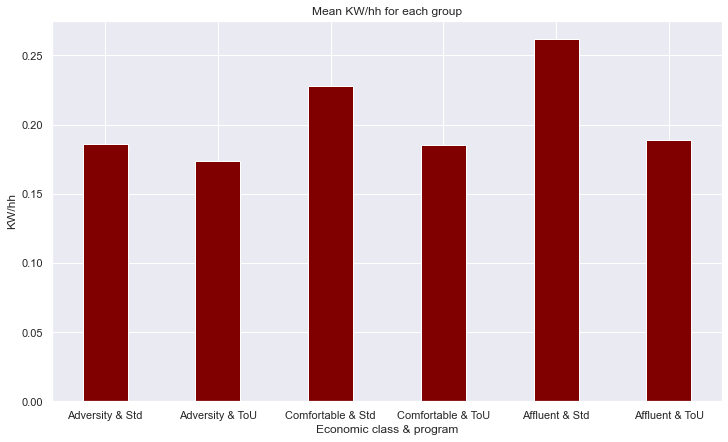

In [71]:
# creating the dataset
group = ['Adversity & Std', 'Adversity & ToU', 'Comfortable & Std', 'Comfortable & ToU',
         'Affluent & Std', 'Affluent & ToU',]
mean = [0.186, 0.174, 0.228, 0.185, 0.262, 0.189] # check these numbers.
   
fig = plt.figure(figsize = (12, 7))
 
# creating the bar plot
plt.bar(group, mean, color ='maroon',
        width = 0.4)
 
plt.xlabel("Economic class & program")
plt.ylabel("KW/hh")
plt.title("Mean KW/hh for each group")
plt.show()

In [40]:
gb2 = df.groupby(['Acorn_grouped', 'Month', 'Day']).mean() # group by to do more EDA.
df2 = pd.DataFrame(gb2) # Put gb in df.

In [49]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19654440 entries, 0 to 19654439
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DateTime         datetime64[ns]
 1   LCLid            object        
 2   stdorToU         object        
 3   KWH/hh           float64       
 4   Acorn            object        
 5   Acorn_grouped    object        
 6   Day              object        
 7   air_temperature  float64       
 8   Month            object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.3+ GB


In [77]:
df.describe().round(2)

,KWH/hh,air_temperature
count,19654440.00,19654440.00
mean,0.22,51.68
std,0.31,12.05
min,0.00,24.44
25%,0.06,42.44
50%,0.12,50.99
75%,0.24,60.44
max,9.14,92.66


In [68]:
sns.set(rc = {'figure.figsize':(18,12)})

<AxesSubplot:>

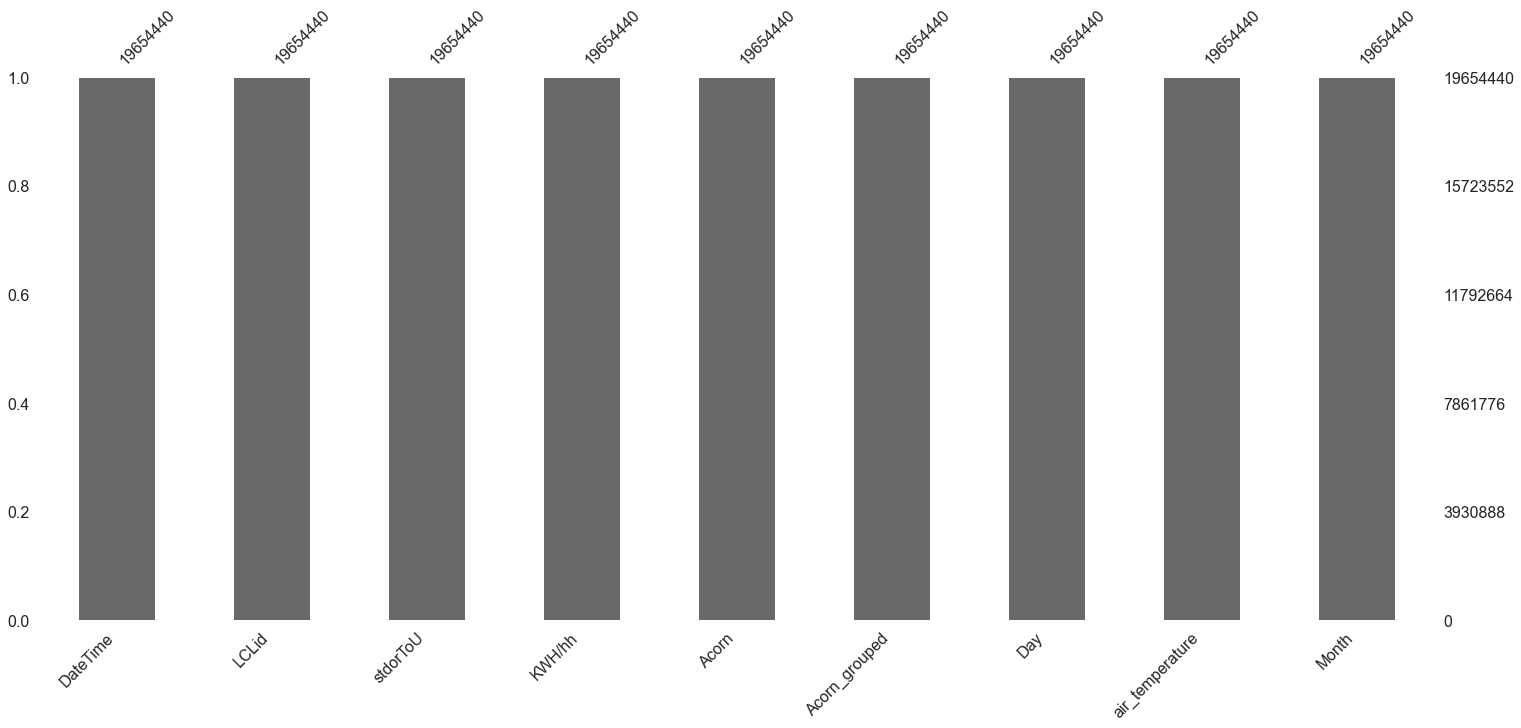

In [64]:
msno.bar(df)

In [78]:
gb3 = df.groupby(['Acorn_grouped', 'Month']).mean() # group by to do more EDA.
df3 = pd.DataFrame(gb3) # Put gb in df.

In [81]:
df3

KWH/hh  air_temperature
Acorn_grouped Month                               
Adversity     April      0.184048        47.556697
              August     0.149766        65.831659
              December   0.212298        44.900098
              February   0.219021        38.783859
              January    0.223391        40.243402
              July       0.151537        69.265198
              June       0.154084        59.791763
              March      0.212672        38.838489
              May        0.164497        53.245500
              November   0.198987        45.544719
              October    0.173906        56.331007
              September  0.159113        59.129223
Affluent      April      0.244330        47.556697
              August     0.181717        65.831641
              December   0.293348        44.900101
              February   0.302272        38.783859
              January    0.311169        40.243401
              July       0.185743        69.265178
              June       0.198589        59.791763
              March      0.297192        38.838489
              May        0.210484        53.245500
              November   0.271724        45.544719
              October    0.228058        56.331007
              September  0.213348        59.129223
Comfortable   April      0.218001        47.556697
              August     0.175472        65.831659
              December   0.253798        44.900131
              February   0.265411        38.783859
              January    0.274106        40.243419
              July       0.176649        69.265198
              June       0.180652        59.791763
              March      0.258547        38.838489
              May        0.191477        53.245500
              November   0.234176        45.544719
              October    0.202493        56.331007
              September  0.187123        59.129223

In [105]:
Adversity_kh_per_month = [0.223391, 0.219021, 0.212672, 0.184048, 0.164497, 0.154084, 0.151537,
                          0.149766, 0.159113, 0.173906, 0.198987, 0.212298]
Comfortable_kh_per_month = [0.274106, 0.265411, 0.258547, 0.218001, 0.191477, 0.180652, 0.176649, 
                            0.175472, 0.187123, 0.202493, 0.234176, 0.253798]
Affluent_kh_per_month = [0.311169, 0.302272, 0.297192, 0.244330, 0.210484, 0.198589, 0.185743, 
                         0.181717, 0.213348, 0.228058, 0.271724, 0.293348]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
temp = [40.243402/100.0, 38.783859/100.0, 38.838489/100.0, 47.556697/100.0, 53.245500/100.0, 59.791763/100.0, 69.265198/100.0, 
        65.831659/100.0, 59.129223/100.0, 56.331007/100.0, 45.544719/100.0, 44.900098/100.0]

In [117]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

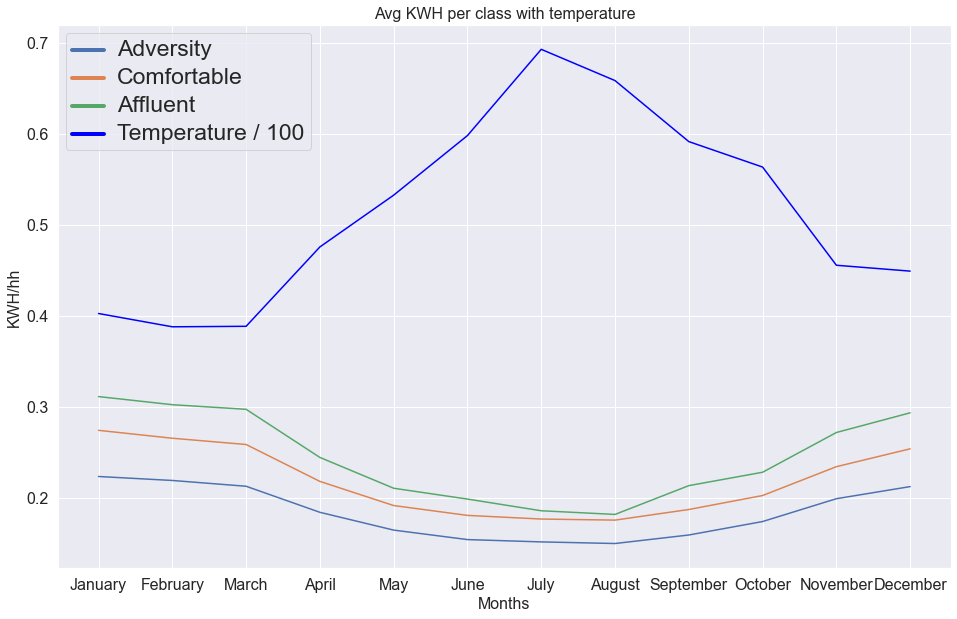

In [121]:
plt.figure(figsize=(16, 10))
# plot lines

plt.plot(months, Adversity_kh_per_month, label = "Adversity")
plt.plot(months, Comfortable_kh_per_month, label = "Comfortable")
plt.plot(months, Affluent_kh_per_month, label = "Affluent")
plt.plot(months, temp, label = "Temperature / 100", color="Blue")

# Add title and axis names
plt.title('Avg KWH per class with temperature')
plt.ylabel('KWH/hh')
plt.xlabel('Months')

leg = plt.legend()
# get the lines and texts inside legend box
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')

plt.show()

In [125]:
gb4 = df.groupby(['Acorn_grouped', 'Day']).mean() # group by to do more EDA.
df4 = pd.DataFrame(gb4) # Put gb in df.

In [126]:
df4

KWH/hh  air_temperature
Acorn_grouped Day                                 
Adversity     Friday     0.180237        52.104600
              Monday     0.183257        51.996249
              Saturday   0.185384        51.191293
              Sunday     0.194941        51.422454
              Thursday   0.179455        51.934856
              Tuesday    0.180226        51.483037
              Wednesday  0.181333        51.637674
Affluent      Friday     0.241896        52.104602
              Monday     0.244449        51.996249
              Saturday   0.247050        51.191293
              Sunday     0.256672        51.422454
              Thursday   0.239783        51.934845
              Tuesday    0.242321        51.483026
              Wednesday  0.240721        51.637674
Comfortable   Friday     0.215364        52.104619
              Monday     0.216949        51.996249
              Saturday   0.222041        51.191293
              Sunday     0.232805        51.422454
              Thursday   0.211564        51.934856
              Tuesday    0.213698        51.483037
              Wednesday  0.214214        51.637685

In [180]:
gb5 = df.groupby(['Acorn_grouped', 'Day']).median() # group by to do more EDA.
df5 = pd.DataFrame(gb5) # Put gb in df.

In [181]:
df5

KWH/hh  air_temperature
Acorn_grouped Day                               
Adversity     Friday      0.111           50.720
              Monday      0.113           51.620
              Saturday    0.113           51.035
              Sunday      0.116           50.630
              Thursday    0.110           50.720
              Tuesday     0.110           50.810
              Wednesday   0.111           51.080
Affluent      Friday      0.121           50.720
              Monday      0.122           51.620
              Saturday    0.124           51.035
              Sunday      0.127           50.630
              Thursday    0.120           50.720
              Tuesday     0.121           50.810
              Wednesday   0.121           51.080
Comfortable   Friday      0.126           50.720
              Monday      0.127           51.620
              Saturday    0.130           51.035
              Sunday      0.132           50.630
              Thursday    0.124           50.720
              Tuesday     0.125           50.810
              Wednesday   0.124           51.080

In [127]:
Adversity_kh_per_day = [0.183257, 0.180226, 0.181333, 0.179455, 0.180237, 0.185384, 0.194941]

Comfortable_kh_per_day = [0.216949, 0.213698, 0.214214, 0.211564, 0.215364, 0.222041, 0.232805]

Affluent_kh_per_day = [0.244449, 0.242321, 0.240721, 0.239783, 0.241896, 0.247050, 0.256672]
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


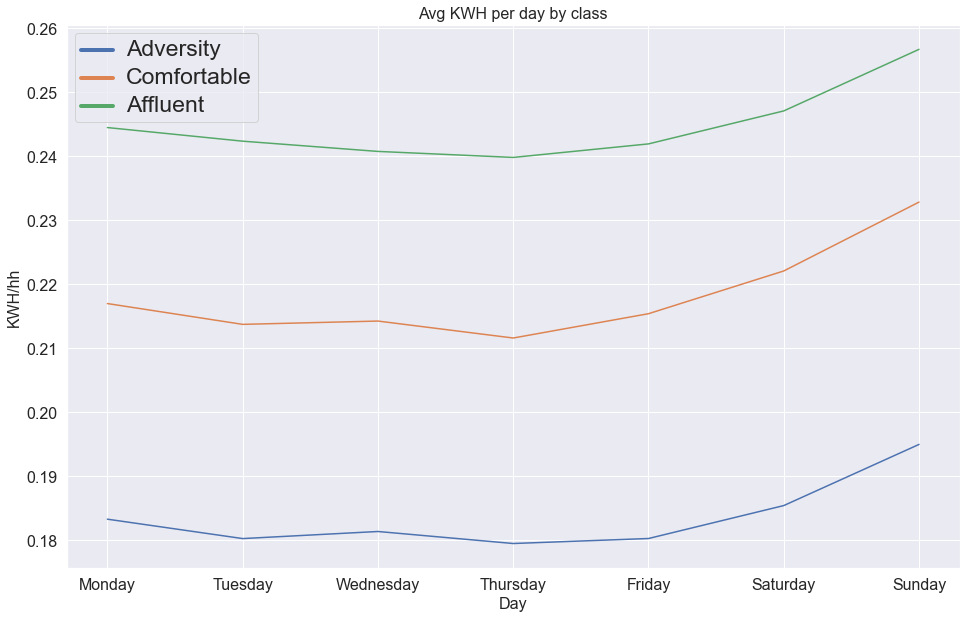

In [129]:
plt.figure(figsize=(16, 10))
# plot lines

plt.plot(day, Adversity_kh_per_day, label = "Adversity")
plt.plot(day, Comfortable_kh_per_day, label = "Comfortable")
plt.plot(day, Affluent_kh_per_day, label = "Affluent")

# Add title and axis names
plt.title('Avg KWH per day by class')
plt.ylabel('KWH/hh')
plt.xlabel('Day')

leg = plt.legend()
# get the lines and texts inside legend box
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')

plt.show()

In [170]:
MAC000002_df = df[df['LCLid'] == 'MAC000002']
MAC004208_df = df[df['LCLid'] == 'MAC004208']

In [138]:
MAC000002_df.to_csv("C:\\Users\\jesse\\Downloads\\clases\\electrical data\\london data\\data\\MAC000002_df.csv", index = False) # full dataset

In [137]:
MAC000010_df.to_csv("C:\\Users\\jesse\\Downloads\\clases\\electrical data\\london data\\data\\MAC000010_df.csv", index = False) # full dataset

<AxesSubplot:>

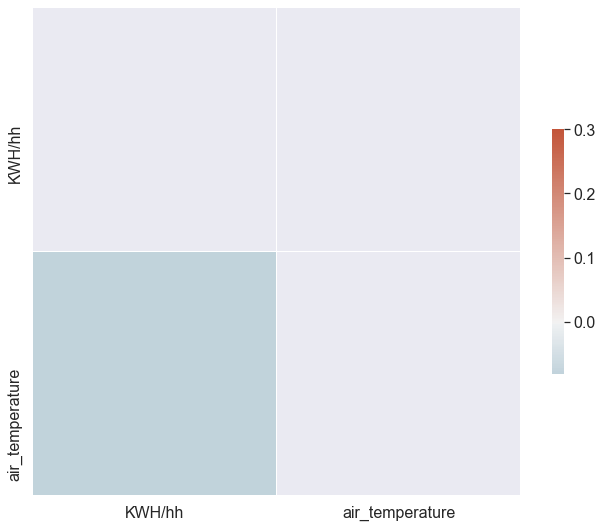

In [139]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

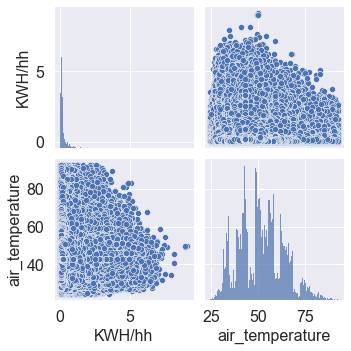

In [140]:
# Basic correlogram
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='KWH/hh', ylabel='Acorn_grouped'>

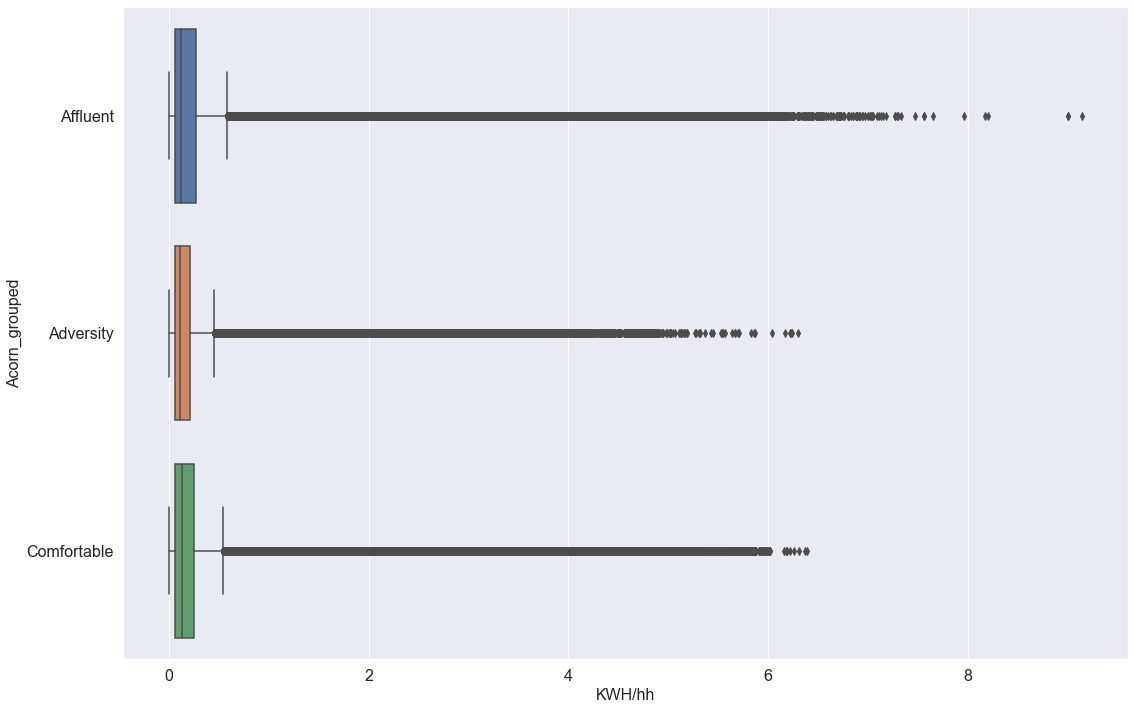

In [141]:
sns.boxplot(x='KWH/hh',y='Acorn_grouped',data=df)

In [169]:
Adversity_Std

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
17580,2013-01-01 00:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,48.02,January
17581,2013-01-01 00:30:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.84,January
17582,2013-01-01 01:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.66,January
17583,2013-01-01 01:30:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.39,January
17584,2013-01-01 02:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.12,January
...,...,...,...,...,...,...,...,...,...
19601695,2014-01-01 21:30:00,MAC004208,Std,0.739,ACORN-Q,Adversity,Wednesday,42.80,January
19601696,2014-01-01 22:00:00,MAC004208,Std,0.485,ACORN-Q,Adversity,Wednesday,42.80,January
19601697,2014-01-01 22:30:00,MAC004208,Std,0.520,ACORN-Q,Adversity,Wednesday,42.80,January
19601698,2014-01-01 23:00:00,MAC004208,Std,0.390,ACORN-Q,Adversity,Wednesday,42.80,January


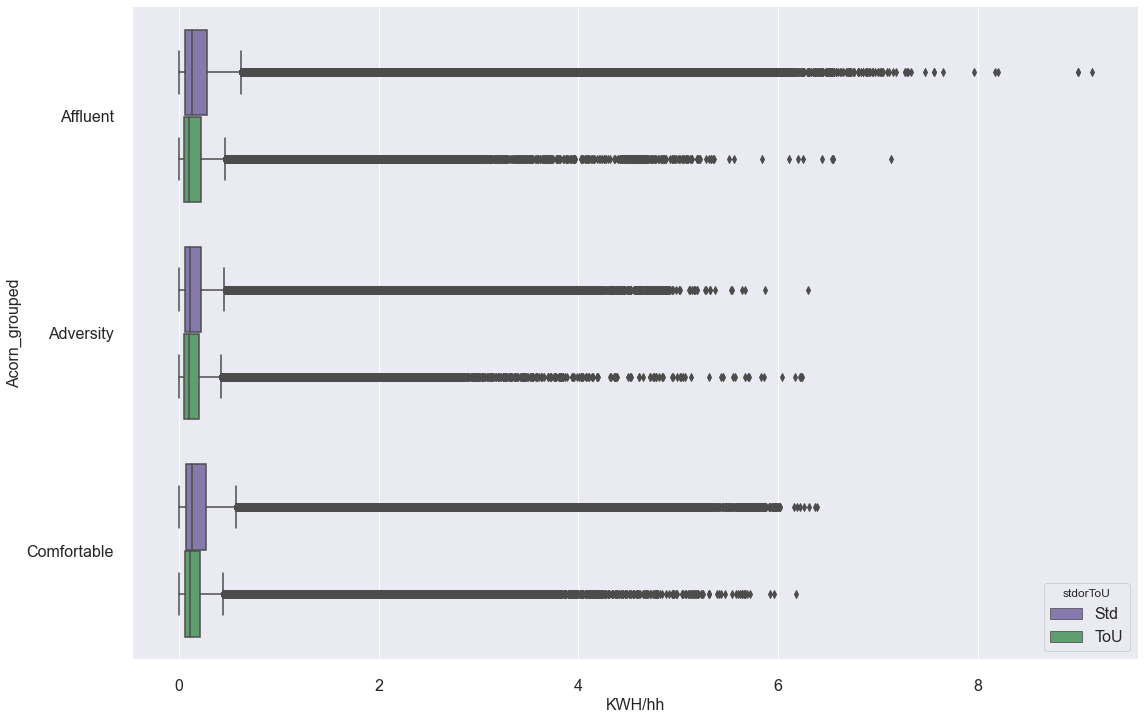

In [176]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='KWH/hh', y='Acorn_grouped',
            hue="stdorToU", palette=["m", "g", "b"],
            data=df) 
sns.despine(offset=10, trim=True)

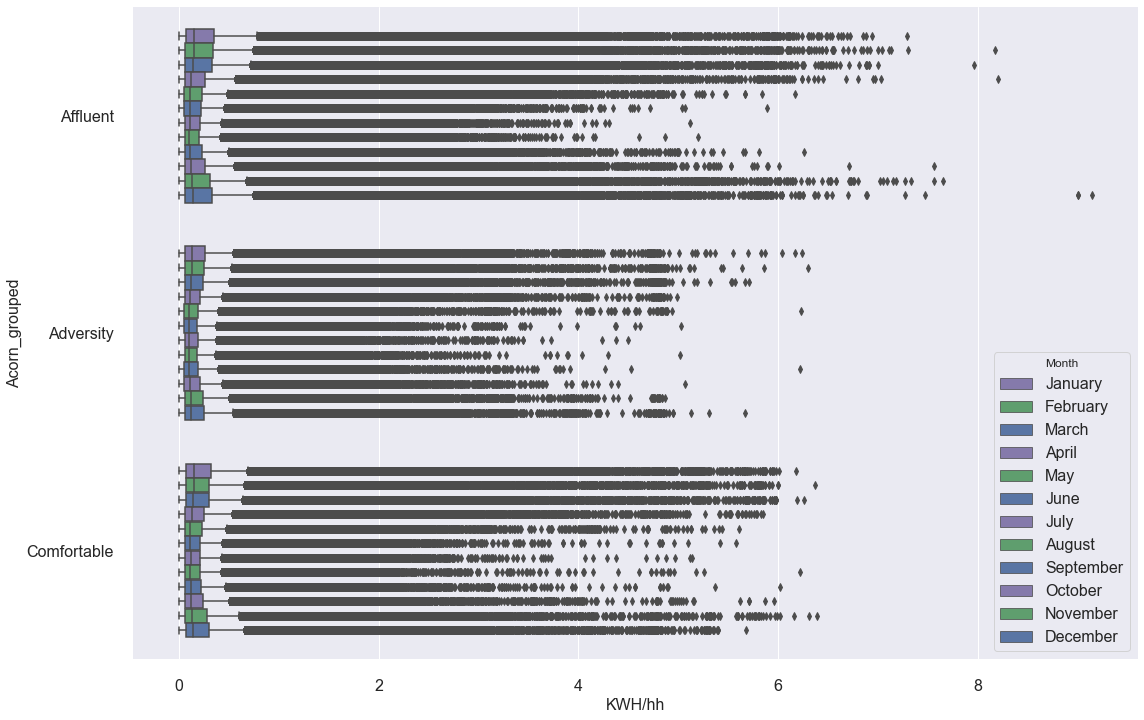

In [175]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='KWH/hh', y='Acorn_grouped',
            hue="Month", palette=["m", "g", "b"],
            data=df) 
sns.despine(offset=10, trim=True)

In [183]:
rslt_df = df[df['KWH/hh'] > 1] 
rslt_df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
80,2013-01-02 16:00:00,MAC000002,Std,1.078,ACORN-A,Affluent,Wednesday,48.20,January
137,2013-01-03 20:30:00,MAC000002,Std,1.098,ACORN-A,Affluent,Thursday,51.71,January
230,2013-01-05 19:00:00,MAC000002,Std,1.181,ACORN-A,Affluent,Saturday,50.72,January
280,2013-01-06 20:00:00,MAC000002,Std,1.092,ACORN-A,Affluent,Sunday,47.48,January
375,2013-01-08 19:30:00,MAC000002,Std,1.241,ACORN-A,Affluent,Tuesday,50.72,January
...,...,...,...,...,...,...,...,...,...
19651014,2013-10-22 16:30:00,MAC004219,Std,1.478,ACORN-E,Affluent,Tuesday,64.04,October
19652123,2013-11-14 18:30:00,MAC004219,Std,1.002,ACORN-E,Affluent,Thursday,43.43,November
19652412,2013-11-20 19:00:00,MAC004219,Std,1.168,ACORN-E,Affluent,Wednesday,39.38,November
19653069,2013-12-04 11:00:00,MAC004219,Std,1.189,ACORN-E,Affluent,Wednesday,46.40,December


In [189]:
len(rslt_df['LCLid'].unique())

1027

In [195]:
gb6 = rslt_df.groupby(['Month', 'Day']).count() # group by to do more EDA.
df6 = pd.DataFrame(gb6) # Put gb in df.

In [198]:
df6.head(20).T

Month            April                                                    \
Day             Friday Monday Saturday Sunday Thursday Tuesday Wednesday   
DateTime          6438   8186     6409   6507     6297    7289      6300   
LCLid             6438   8186     6409   6507     6297    7289      6300   
stdorToU          6438   8186     6409   6507     6297    7289      6300   
KWH/hh            6438   8186     6409   6507     6297    7289      6300   
Acorn             6438   8186     6409   6507     6297    7289      6300   
Acorn_grouped     6438   8186     6409   6507     6297    7289      6300   
air_temperature   6438   8186     6409   6507     6297    7289      6300   

Month           August                                                    \
Day             Friday Monday Saturday Sunday Thursday Tuesday Wednesday   
DateTime          3475   2765     3549   3123     3351    2765      2670   
LCLid             3475   2765     3549   3123     3351    2765      2670   
stdorToU          3475   2765     3549   3123     3351    2765      2670   
KWH/hh            3475   2765     3549   3123     3351    2765      2670   
Acorn             3475   2765     3549   3123     3351    2765      2670   
Acorn_grouped     3475   2765     3549   3123     3351    2765      2670   
air_temperature   3475   2765     3549   3123     3351    2765      2670   

Month           December                                          
Day               Friday Monday Saturday Sunday Thursday Tuesday  
DateTime            9001  10760     9171  12153     9143   11083  
LCLid               9001  10760     9171  12153     9143   11083  
stdorToU            9001  10760     9171  12153     9143   11083  
KWH/hh              9001  10760     9171  12153     9143   11083  
Acorn               9001  10760     9171  12153     9143   11083  
Acorn_grouped       9001  10760     9171  12153     9143   11083  
air_temperature     9001  10760     9171  12153     9143   11083

In [199]:
df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
0,2013-01-01 00:00:00,MAC000002,Std,0.219,ACORN-A,Affluent,Tuesday,48.02,January
1,2013-01-01 00:30:00,MAC000002,Std,0.241,ACORN-A,Affluent,Tuesday,47.84,January
2,2013-01-01 01:00:00,MAC000002,Std,0.191,ACORN-A,Affluent,Tuesday,47.66,January
3,2013-01-01 01:30:00,MAC000002,Std,0.235,ACORN-A,Affluent,Tuesday,47.39,January
4,2013-01-01 02:00:00,MAC000002,Std,0.182,ACORN-A,Affluent,Tuesday,47.12,January
...,...,...,...,...,...,...,...,...,...
19654435,2014-01-01 21:30:00,MAC004219,Std,0.266,ACORN-E,Affluent,Wednesday,42.80,January
19654436,2014-01-01 22:00:00,MAC004219,Std,0.260,ACORN-E,Affluent,Wednesday,42.80,January
19654437,2014-01-01 22:30:00,MAC004219,Std,0.301,ACORN-E,Affluent,Wednesday,42.80,January
19654438,2014-01-01 23:00:00,MAC004219,Std,0.223,ACORN-E,Affluent,Wednesday,42.80,January


In [ ]:
# SCALE FIRST THEN DO DUMMIES
pd.get_dummies(s)


In [201]:
a3d = np.array(list(df.groupby('LCLid').apply(pd.DataFrame.as_matrix)))
a3d = np.dstack(list(df.groupby('LCLid').apply(pd.DataFrame.as_matrix)))


AttributeError: type object 'DataFrame' has no attribute 'as_matrix'

In [202]:
df.to_numpy()

array([[Timestamp('2013-01-01 00:00:00'), 'MAC000002', 'Std', ...,
        'Tuesday', 48.02, 'January'],
       [Timestamp('2013-01-01 00:30:00'), 'MAC000002', 'Std', ...,
        'Tuesday', 47.84, 'January'],
       [Timestamp('2013-01-01 01:00:00'), 'MAC000002', 'Std', ...,
        'Tuesday', 47.66, 'January'],
       ...,
       [Timestamp('2014-01-01 22:30:00'), 'MAC004219', 'Std', ...,
        'Wednesday', 42.8, 'January'],
       [Timestamp('2014-01-01 23:00:00'), 'MAC004219', 'Std', ...,
        'Wednesday', 42.8, 'January'],
       [Timestamp('2014-01-01 23:30:00'), 'MAC004219', 'Std', ...,
        'Wednesday', 42.8, 'January']], dtype=object)